In [1]:
import flim
from flim.experiments import utils
from flim.models.lcn import LCNCreator

import torch

import numpy as np

import matplotlib.pyplot as plt

In [2]:
if torch.cuda.is_available():
    device = 'cuda:0'
else:
    device = 'cpu'

In [3]:
architecture = utils.load_architecture('arch.json')

In [4]:
# the images are in LAB color space and have
images, markers = utils.load_images_and_markers('images_and_markers')

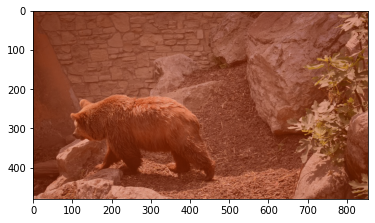

In [6]:
plt.imshow(utils.from_lab_to_rgb(images[0]))

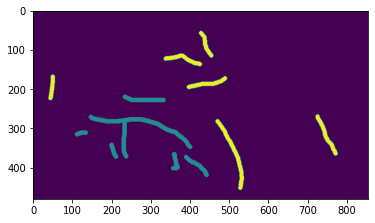

In [6]:
plt.imshow(markers[0])

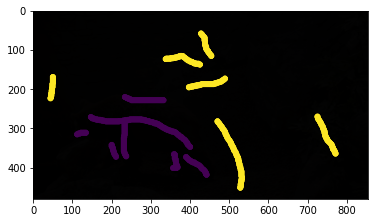

In [7]:
plt.imshow(utils.from_lab_to_rgb(images[0]))

x, y = np.where(markers[0] != 0)

plt.scatter(y, x, s=1, c=markers[0, x, y])


In [8]:
# relabel_markers=True will set a new label for each connected component in the markers
creator = LCNCreator(architecture, images=images, markers=markers, relabel_markers=False, device=device)

In [9]:
# Build the feature extractor using FLIM
creator.build_model()

Building m_norm
Building conv
Building activation
Building pool
Building norm1
Building m_norm2
Building conv2


KeyboardInterrupt: 

In [ ]:
# model is a PyTorch Module https://pytorch.org/docs/stable/generated/torch.nn.Module.html
model = creator.get_LIDSConvNet()

In [ ]:
# input mut be a PyTorch Tensor with shape (N, C, H, W)
x = torch.from_numpy(images).permute(0, 3, 1, 2).float().to(device)

In [ ]:
features = model.forward(x)

In [ ]:
print(features.size())

torch.Size([1, 64, 480, 854])


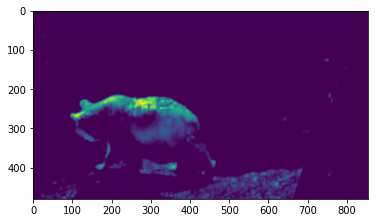

In [ ]:
plt.imshow(features[0, 0, :].detach().cpu())